### 1. Load and Explore raw Dataset

**[1.1]** Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**[1.2]** Import data 

In [2]:
# Read in the csv
df = pd.read_csv("../data/raw/beer_reviews.csv")

**[1.3]** Display the first 5 rows of df

In [3]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


**[1.4]** Display the last 5 rows of df

In [4]:
df.tail()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061
1586613,14359,The Defiant Brewing Company,1160005319,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


**[1.5]** Display the dimensions (shape) of df

In [5]:
df.shape

(1586614, 13)

**[1.6]** Display the list of columns of df

In [6]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

**[1.7]** Display the descriptive statistics of df

In [7]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


**[1.8]** Display the summary (info) of df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


### 2.Features Engineering

**[2.1]** Let's create a copy of our training dataframe

In [14]:
df_cleaned = df.copy()

**[2.2]** Select the necessary columns and drop columns 'brewery_id','review_time','review_profilename', 
       'beer_beerid'

In [15]:
# Select necessary columns
df_cleaned = df_cleaned[['review_appearance', 'review_aroma', 'review_palate', 'review_taste', 'beer_abv','beer_name', 'beer_style']]
df_cleaned.head()

,review_appearance,review_aroma,review_palate,review_taste,beer_abv,beer_name,beer_style
0,2.5,2.0,1.5,1.5,5.0,Sausa Weizen,Hefeweizen
1,3.0,2.5,3.0,3.0,6.2,Red Moon,English Strong Ale
2,3.0,2.5,3.0,3.0,6.5,Black Horse Black Beer,Foreign / Export Stout
3,3.5,3.0,2.5,3.0,5.0,Sausa Pils,German Pilsener
4,4.0,4.5,4.0,4.5,7.7,Cauldron DIPA,American Double / Imperial IPA


**[2.3]** Handling missing values

In [16]:
# Handle missing values
df_cleaned['beer_abv'].fillna(df_cleaned['beer_abv'].mean(), inplace=True)
df_cleaned['beer_name'].fillna('unknown', inplace=True)

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   review_appearance  1586614 non-null  float64
 1   review_aroma       1586614 non-null  float64
 2   review_palate      1586614 non-null  float64
 3   review_taste       1586614 non-null  float64
 4   beer_abv           1586614 non-null  float64
 5   beer_name          1586614 non-null  object 
 6   beer_style         1586614 non-null  object 
dtypes: float64(5), object(2)
memory usage: 84.7+ MB


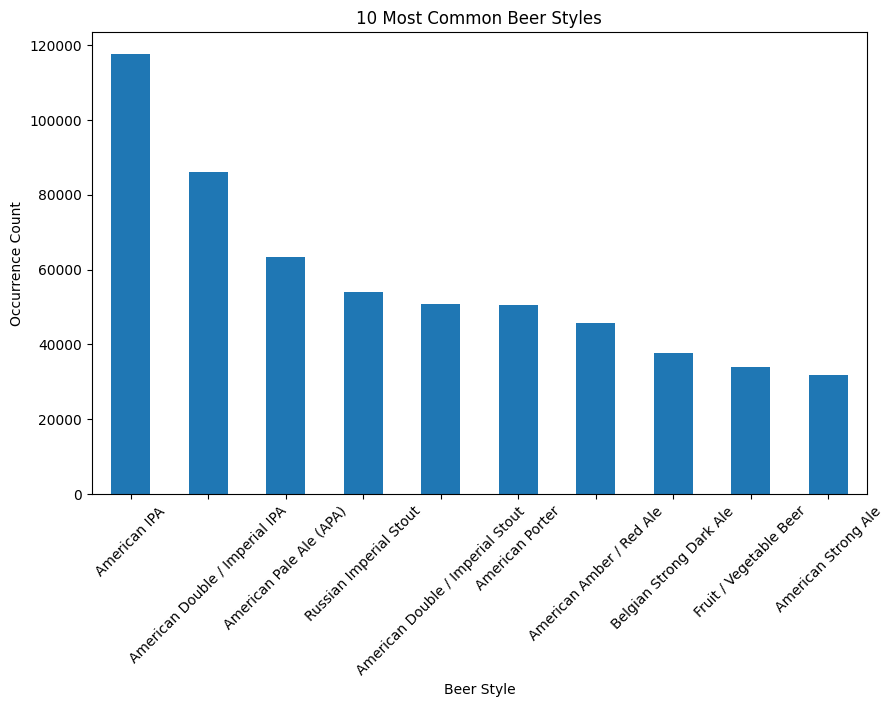

In [18]:
# Count the occurrence of each beer style and sort in ascending order
beer_style_counts = df_cleaned['beer_style'].value_counts().sort_values(ascending=False)

# Select the 10 least common beer styles
least_common_styles = beer_style_counts.head(10)

# Plot the 10 least common beer styles as a bar graph
plt.figure(figsize=(10, 6))
least_common_styles.plot(kind='bar')
plt.xlabel('Beer Style')
plt.ylabel('Occurrence Count')
plt.title('10 Most Common Beer Styles')
plt.xticks(rotation=45)
plt.show()


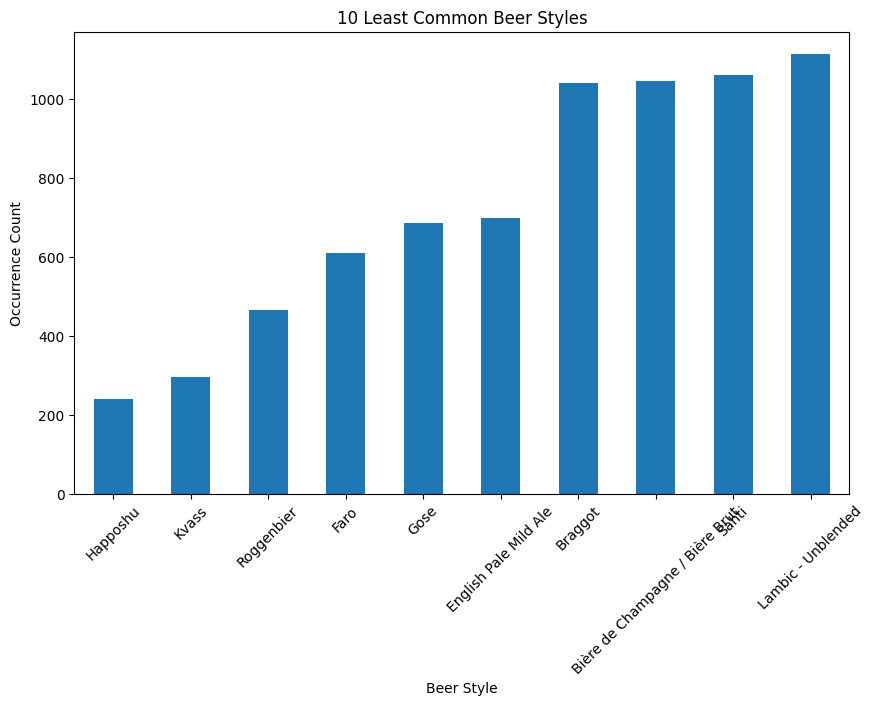

In [19]:

# Count the occurrence of each beer style and sort in ascending order
beer_style_counts = df['beer_style'].value_counts().sort_values()

# Select the 10 least common beer styles
least_common_styles = beer_style_counts.head(10)

# Plot the 10 least common beer styles as a bar graph
plt.figure(figsize=(10, 6))
least_common_styles.plot(kind='bar')
plt.xlabel('Beer Style')
plt.ylabel('Occurrence Count')
plt.title('10 Least Common Beer Styles')
plt.xticks(rotation=45)
plt.show()


**[2.4] Categorical feature encoding**: Some features like 'brewery_name', 'beer_name', 'beer_style' are categorical variables. We can encode them using techniques such as one-hot encoding or label encoding to represent them numerically. This allows the model to understand the categorical information

In [20]:
import category_encoders as ce

In [21]:
# Encode the beer_style column
le = LabelEncoder()
df_cleaned['beer_style'] = le.fit_transform(df_cleaned['beer_style'])

In [22]:
# Select columns to be encoded
cols_to_encode = ['beer_name']

# Instantiate encoder
encoder = ce.TargetEncoder(cols=cols_to_encode)

In [23]:
# Fit and transform the columns
df_encoded = encoder.fit_transform(df_cleaned[cols_to_encode], df_cleaned['beer_style'])
# Replace original columns with encoded ones in the dataframe
df_cleaned.drop(cols_to_encode, axis=1, inplace=True)
df_cleaned = pd.concat([df_cleaned, df_encoded], axis=1)

In [25]:
df_cleaned

,review_appearance,review_aroma,review_palate,review_taste,beer_abv,beer_style,beer_name
0,2.5,2.0,1.5,1.5,5.0,65,45.116395
1,3.0,2.5,3.0,3.0,6.2,51,43.294876
2,3.0,2.5,3.0,3.0,6.5,59,44.335744
3,3.5,3.0,2.5,3.0,5.0,61,44.595961
4,4.0,4.5,4.0,4.5,7.7,9,37.830320
...,...,...,...,...,...,...,...
1586609,3.5,4.0,4.0,4.0,5.2,85,57.328741
1586610,2.5,5.0,2.0,4.0,5.2,85,57.328741
1586611,3.0,3.5,3.5,4.0,5.2,85,57.328741
1586612,4.5,4.5,4.5,4.5,5.2,85,57.328741


**[2.6] Standard scalling all features except the target variable**

In [26]:
y = df_cleaned.pop("beer_style")
X = df_cleaned

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

**[2.7] Split dataset**

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### 4.   Defining the Architecture of the Multi-Layer Perceptron

**[4.1]** Set the seeds for tensorflow and numpy in order to get reproducible results

In [31]:
tf.random.set_seed(42)

**[4.2]** Instantiate a [.Sequential()](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class and call it `model`

In [32]:
model = tf.keras.Sequential()

**[4.3]** Import the [Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) and [Flatten()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) classes

In [33]:
from tensorflow.keras.layers import Dense, Flatten

**[4.4]** Create a hidden layer of 256 fully connected neurins with ReLU as the activation function followed by another fully connected layer responsible of making final predictions

In [34]:
# layer1 = Dense(128, activation='relu', input_shape=[20], kernel_regularizer=regularizer)
layer1 = Dense(100, activation='relu')
top_layer = Dense(104, activation='softmax')

**[4.5]** Assemble the different layers we just defined to create our first MLP. We will be using the [.add()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add) method

In [35]:
# model.add(flatten_layer)
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layer1)
# model.add(Dropout(0.3))
model.add(top_layer)

**[4.6]** Instantiate the [Adam()](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) class, specify the learning rate to be 0.001 and save it into a variable called `optimizer`

In [36]:
# optimizer = tf.keras.optimizers.RMSprop(0.001)
optimizer = tf.keras.optimizers.Adam(0.001)

**[4.7]** Configure the learning process using the [.compile()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#methods_2) method and specify the loss function, optimizer and the metrics to be used

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**[4.8]** Print the model architecture with [.summary()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               896       
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 104)               10504     
                                                                 
Total params: 24,300
Trainable params: 24,300
Non-trainable params: 0
_________________________________________________________________


### 5. Training and Evaluation of the Model

**[5.1]** Train the model using the [.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method on the training set on 5 epochs and create a validation set (20%)### 5. Training and Evaluation of the Model

In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=256, validation_split=0.2, verbose=1)
# history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/60
3967/3967 [==============================] - 8s 2ms/step - loss: 1.9799 - accuracy: 0.4553 - val_loss: 1.5994 - val_accuracy: 0.5776
Epoch 2/60
3967/3967 [==============================] - 8s 2ms/step - loss: 1.4675 - accuracy: 0.6150 - val_loss: 1.3753 - val_accuracy: 0.6436
Epoch 3/60
3967/3967 [==============================] - 7s 2ms/step - loss: 1.3097 - accuracy: 0.6653 - val_loss: 1.2733 - val_accuracy: 0.6838
Epoch 4/60
3967/3967 [==============================] - 7s 2ms/step - loss: 1.2317 - accuracy: 0.6884 - val_loss: 1.2167 - val_accuracy: 0.6914
Epoch 5/60
3967/3967 [==============================] - 7s 2ms/step - loss: 1.1812 - accuracy: 0.7029 - val_loss: 1.1676 - val_accuracy: 0.7096
Epoch 6/60
3967/3967 [==============================] - 7s 2ms/step - loss: 1.1448 - accuracy: 0.7145 - val_loss: 1.1344 - val_accuracy: 0.7148
Epoch 7/60
3967/3967 [==============================] - 7s 2ms/step - loss: 1.1156 - accuracy: 0.7224 - val_loss: 1.1078 - val_accuracy:

**[5.2]** Evaluate the performance of this model on the testing set using [.evaluate()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [40]:
# Evaluate the model
model.evaluate(X_test, y_test)

9917/9917 [==============================] - 8s 791us/step - loss: 0.8147 - accuracy: 0.7983


[0.814651370048523, 0.7982938289642334]

### 6. Analysing the Results

**[6.1]** Plot the learning curve for accuracy score on the training and validation sets. We will use the [.plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) method to create a line chart.

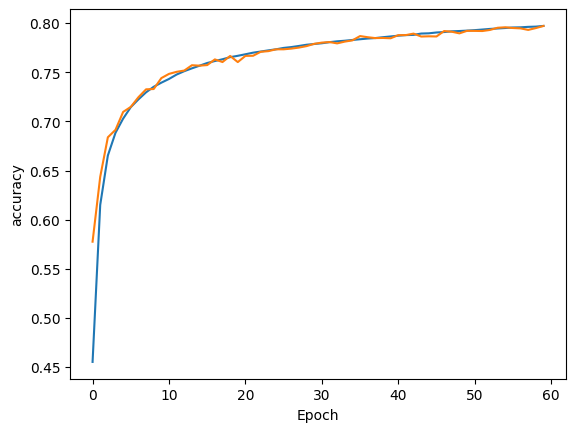

In [41]:
plt.plot(history.history['accuracy'], label='MSE training')
plt.plot(history.history['val_accuracy'], label='MSE validation')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

**[6.2]** Using the trained model, print the predicted outcome on the first observation of the testing set by using the [.predict()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) method

In [42]:
sparse_pred_test = model.predict(X_test)
sparse_pred_test[0]

9917/9917 [==============================] - 7s 656us/step


array([0.00000000e+00, 3.50285514e-28, 3.19161964e-09, 0.00000000e+00,
       9.29928184e-01, 2.77373692e-05, 1.05292350e-29, 1.35472487e-06,
       0.00000000e+00, 3.70975062e-02, 1.56304233e-10, 1.01437587e-08,
       3.25427988e-26, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.95176089e-34, 0.00000000e+00, 1.14596835e-20, 3.29324603e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.57375529e-21, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.07069627e-06, 8.71609862e-15,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.24203105e-14,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.15780592e-20,
      

**[6.3]**  The output from the model is the probability for each class of the target variable. In order to get the final predicted value, we need to the [.argmax()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) method from numpy.

In [43]:
pred_test = np.argmax(sparse_pred_test, 1)
pred_test[0]

4

**[6.4]** Let's compare this prediction to the actual true value

In [49]:
y_test.head(1)

859964    4
Name: beer_style, dtype: int32